In [1]:
from __future__ import division
import netCDF4 as nc
import numpy as np
import os
import scipy.io as sio

%matplotlib inline
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools
from matplotlib.path import Path
import matplotlib.patches as patches
import pandas as pd

In [2]:
topo_datastruct = sio.loadmat('/ocean/rich/more/mmapbase/bcgeo/PNW.mat')
coast={}
coast['lat'] = topo_datastruct['ncst'][:,1]
coast['lon'] = topo_datastruct['ncst'][:,0]

def draw_coast(ax):
    #Plot coast line
    ax.plot(coast['lon'],coast['lat'],'-k',rasterized=True,markersize=1) 

In [3]:
#bathymetry
fB = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc','r')
lats = fB.variables['nav_lat']
lons = fB.variables['nav_lon']
D = fB.variables['Bathymetry']

def draw_bathy(ax,grid):
   
    if grid=='grid':
        mesh=ax.pcolormesh(D[:],cmap=cmap)

    elif grid=='map':
        mesh=ax.pcolormesh(lons[:],lats[:],D[:],cmap=cmap)
        mesh=ax.contourf(lons[:],lats[:],D[:],15,cmap=cmap)
    
    viz_tools.plot_coastline(ax,fB,coords=grid)   
    cbar=fig.colorbar(mesh,ax=ax)
    ax.set_aspect(5/4.4)
    cbar.set_label('{depth.long_name} [{depth.units}]'.format(depth=D))

In [4]:
#rivers info
test = nc.Dataset('/ocean/jieliu/research/meopar/nemo-forcing/rivers/rivers_cnst.nc','r')
plotting = test.variables['rorunoff'][0,:,:]
#Fraser River points
ifraser=[334,318]
jfraser=[414,434]
ls=['Fraser River',""]


def draw_rivers(ax,grid):
    for i in range(0,898):
        for j in range(0,398):
            if plotting[i,j] > 0:
                if grid=='grid':
                    ax.plot(j,i,'ob',markersize=3)  
                elif grid=='map':
                    ax.plot(lons[i,j],lats[i,j],'og',markersize=3,rasterized=True) 
    for k in range(0,len(ifraser)):
        if grid =='map':
            x=lons[jfraser[k],ifraser[k]]; y=lats[jfraser[k],ifraser[k]]
            label=ls[k]
            print(label)
            ax.plot(x,y,'og',markersize=3,rasterized=True)
            if label == 'Fraser River':
                ax.annotate(label, xy=(x,y), xytext = (3, 30),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),color = 'g',fontsize=13)
            if label == "":
                ax.annotate(label, xy=(x,y), xytext = (50, 20),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),fontsize=13)

In [5]:
SITES = {
    'Sandheads':{
        'lat' : 49.1,
        'lon' : -123.3,
        'depth' : 18,
        'i' : 428,
        'j' : 283
    },    
    'VENUS Central': {
        'lat': 49.0401,
        'lon': -123.4261,
        'depth' : 300,
        'i': 424,
        'j': 266
        },
        }
def draw_VENUS(ax,grid,name):
    ax.plot(SITES[name]['lon'],SITES[name]['lat'],'r*',markersize=5,rasterized=True)
    if name=='Sandheads':
        x = -123.3; y = 49.1;
        ax.annotate(name, xy=(x,y), xytext = (-15, 70),textcoords = 'offset points',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),color = 'r',fontsize=13)

In [6]:
filename = '/data/nsoontie/MEOPAR/analysis/compare_tides/obs_tidal_wlev_const_all.csv'

harm_obs = pd.read_csv(filename,sep=';',header=0)
harm_obs = harm_obs.rename(columns={'Site': 'site', 'Lat': 'lat', 'Lon': 'lon', 
                                    'M2 amp': 'M2_amp', 'M2 phase (deg UT)': 'M2_pha',
                                   'K1 amp': 'K1_amp', 'K1 phase (deg UT)': 'K1_pha'})

def draw_tidestations(ax):
    stations_obs = ['Port Renfrew','Sheringham Point','Pedder Bay', 'Esquimalt',
                    'Victoria','Clover Point','Finnerty Cove', 'Fulford Harbour',
                    'Tumbo Channel','Patos Island','Whaler Bay', 'Tsawwassen',
                    'Sandheads', 'Point Grey','Point Atkinson','Gibsons Landing',
                    'Halfmoon Bay','Irvines Landing','Powell River', 'Lund',
                    'Twin Islets','Campbell River','Maude Island E', 'Nymphe Cove',
                    'Seymour Narrows','Brown Bay','Chatham Point','Kelsey Bay','Yorke Island']
    numsta=len(stations_obs)
    lon=[]; lat=[]
    for stn in range(numsta):
        location = stations_obs[stn]
        lon.append(-harm_obs.lon[harm_obs.site==location])
        lat.append(harm_obs.lat[harm_obs.site==location])
        print (stn+1, location)
        ax.annotate(stn+1, xy = (-harm_obs.lon[harm_obs.site==location],harm_obs.lat[harm_obs.site==location]), 
                    xytext = (-5,5),ha = 'left', va = 'bottom',textcoords = 'offset points',fontsize=10)
    ax.scatter(lon,lat,marker='^',s=80,edgecolor='black',linewidth='1',facecolor='green',rasterized=True)

Fraser River



/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


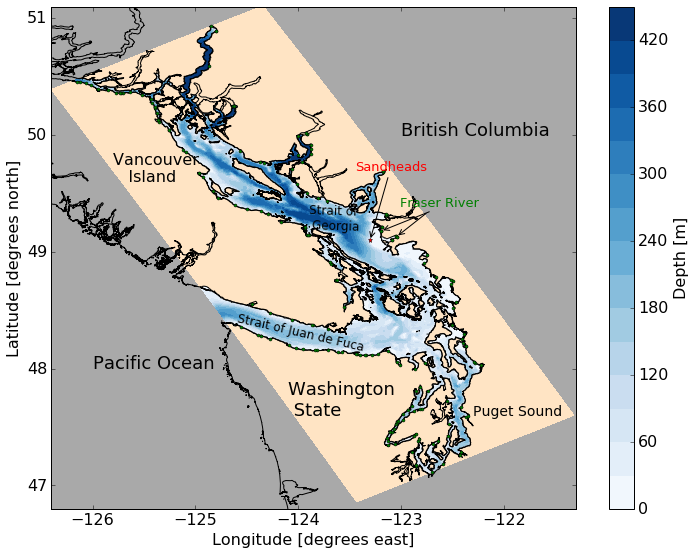

In [7]:
cmap = plt.get_cmap('Blues')
cmap.set_bad('bisque')

fig, axs = plt.subplots(1, 1, figsize=(12,9))
ax2=axs
g = 'map'
draw_coast(ax2)
draw_bathy(ax2,g)
draw_rivers(ax2,g)
draw_VENUS(ax2,g,'Sandheads')
#draw_tidestations(ax2)
#draw_storms(ax2,g)

ax2.set_ylabel('{latitude.long_name} [{latitude.units}]'.format(latitude=lats))
ax2.set_xlabel('{longitude.long_name} [{longitude.units}]'.format(longitude=lons))
ax2.set_xlim([-126.4,-121.3])
ax2.set_ylim([46.8,51.1])

font = {'size'   :16}

plt.rc('font', **font)

ax2.text(-126,48,'Pacific Ocean', fontsize=18)
ax2.text(-124.1,47.6,'Washington \n State', fontsize=18)
ax2.text(-122.3,47.6,'Puget Sound', fontsize=14)
ax2.text(-125.8,49.6,'Vancouver \n   Island', fontsize=16)
ax2.text(-123,50,'British Columbia',fontsize=18)
ax2.text(-124.6,48.4,'Strait of Juan de Fuca',fontsize=12,rotation=-13)
ax2.text(-123.9,49.2,'Strait of \n Georgia',fontsize=12,rotation=-2)

ax2.set_axis_bgcolor('darkgray')
fig.show()